In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
%run -i '../../../../../../utils.py'

# Get data

In [12]:
# read meta data
df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_meta = df_meta.drop('Diet', axis=1)
df_meta = df_meta.rename({'MiceID':'SubjectID'}, axis=1)
df_meta.head()

,SubjectID,Vendor,Day,RandomizedGroup
SampleID,,,,
sample141,BI1,Beijing,0,A
sample142,BI2,Beijing,0,B
sample143,BI3,Beijing,0,D
sample144,BI4,Beijing,0,E
sample145,BI5,Beijing,0,C


In [3]:
# read SCFA data
df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [4]:
# read bacterial abundance
df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_bac.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,108301.701888,7101.750943,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,63028.039623,0.0,0.0,0.0,165115.709436,0.0,0.0,0.0,1.322701e+05
sample132,0.0,405068.034693,50064.588558,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,80103.341692,0.0,0.0,0.0,106501.033841,0.0,0.0,0.0,1.003112e+06
sample133,0.0,36169.603950,45332.570284,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,221840.237562,0.0,0.0,0.0,1.866352e+05
sample134,0.0,484302.054587,10150.043060,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,105850.449056,0.0,0.0,0.0,919303.900024,0.0,0.0,0.0,8.714537e+05
sample135,0.0,91489.970533,42374.302141,0.0,0.0,0.0,0.0,0.0,12519.680178,0.0,...,0.0,0.000000,0.0,0.0,0.0,581683.602124,0.0,0.0,0.0,5.335310e+05


# Run ElasticNet

In [10]:
for add_time in ['time',None]:
    df_elasnet, _ = train_scfa_dynamics_model(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        normalize_X=True,
        exclude_group=None,
        exclude_vendor=None,
        model='ElasticNet',
        addVar=add_time,
        use_deriv_scfa=False,
        use_deriv_microbiome=False
    )
    if add_time is not None:
        df_elasnet.to_csv('elasnet_regression_w_time.csv')
    else:
        df_elasnet.to_csv('elasnet_regression_no_time.csv')

# Run RandomForest

In [11]:
for add_time in ['time',None]:
    df_rf_reg, df_rf_opt_paras, _ = train_scfa_dynamics_model(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        normalize_X=True,
        exclude_group=None,
        exclude_vendor=None,
        model='RandomForest',
        addVar=add_time,
        use_deriv_scfa=False,
        use_deriv_microbiome=False
    )
    if add_time is not None:
        df_rf_opt_paras.to_csv('optimal_rf_parameters_w_time.csv')
        df_rf_reg.to_csv('rf_regression_w_time.csv')
    else:
        df_rf_opt_paras.to_csv('optimal_rf_parameters_no_time.csv')
        df_rf_reg.to_csv('rf_regression_no_time.csv')

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 33.1min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 28.5min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 22.2min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 20.5min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 23.9min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 18.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 22.0min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed: 19.0min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 23.5min finished


# Plot SCFA producer and consumer

In [5]:
def plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=True, topN=10, figsize=(10,6), save=False):
    # reformat elastic net
    df_elasnet = df_elasnet.stack().reset_index()
    df_elasnet = df_elasnet[~df_elasnet.level_1.isin(['BestAlpha','BestL1Ratio','R2'])]
    df_elasnet.columns=['SCFA','Variable','Coefficient']
    df_elasnet = df_elasnet.reset_index(drop=True)

    # reformat random forest
    df_rf = df_rf.stack().reset_index()
    df_rf = df_rf[~df_rf.level_1.isin(['R2'])]
    df_rf.columns=['SCFA','Variable','Gini']
    df_rf = df_rf.reset_index(drop=True)

    # merge two tables
    df_joined = pd.merge(df_rf, df_elasnet, left_on=['SCFA','Variable'], right_on=['SCFA','Variable'], how='inner')
    df_joined.columns = ['SCFA','Taxon','RandomForest','ElasticNet']

    # remove features with ElasticNet=0
    if producer:
        df_joined = df_joined[df_joined.ElasticNet>0]
    else:
        df_joined = df_joined[df_joined.ElasticNet<0]
    all_scfa = sorted(set(df_joined.SCFA))
    
    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=len(all_scfa), constrained_layout=True, sharex=True)
    cbar_ax = fig.add_axes([0.94, .45, .015, .2])
    for k,scfa in enumerate(all_scfa):
        curr_df = df_joined[df_joined.SCFA==scfa].set_index('Taxon')
        curr_df = curr_df.drop('SCFA', axis=1)
        curr_df = curr_df.sort_values(by='RandomForest', ascending=False)
        curr_df = curr_df.iloc[0:topN,:] 

        # normalize to -1 and 1
        for c in ['ElasticNet','RandomForest']:
            if producer==False and c=='ElasticNet':
                curr_df[c] = curr_df[c]/np.abs(curr_df[c].min())
            else:
                curr_df[c] = curr_df[c]/np.abs(curr_df[c].max())

        # plot    
        _ = sns.heatmap(curr_df.values, ax=ax[k], cmap='RdBu_r', vmin=-1, vmax=1, cbar = False if k!=2 else True, cbar_ax = None if k!=2 else cbar_ax, linewidths=0.25, linecolor='black')
        ax[k].set_xticklabels(['RandomForest','ElasticNet'], rotation=90, fontsize=12)
        ax[k].set_title(scfa, fontsize=15)
        ax[k].set_yticklabels(curr_df.index, rotation=0, fontsize=12)
        ax[k].tick_params(axis=u'both', which=u'both',length=0)
        
    # save to figure
    if save:
        plt.rcParams['svg.fonttype'] = 'none'
        if producer:
            fig.savefig("scfa_producer_no_time_top%d.svg"%(topN), format="svg")
        else:
            fig.savefig("scfa_consumer_no_time_top%d.svg"%(topN), format="svg")
        
    plt.tight_layout()

## no time

In [6]:
df_elasnet = pd.read_csv('elasnet_regression_no_time.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('rf_regression_no_time.csv', index_col=0).set_index('SCFA')

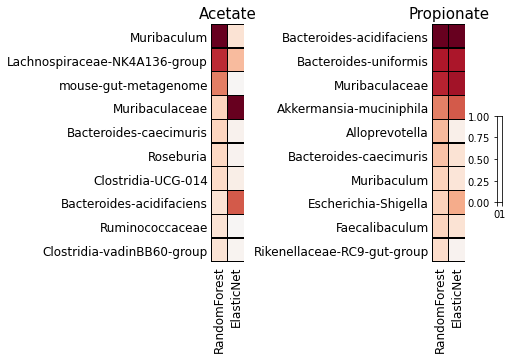

In [8]:
plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=True, figsize=(5,6), save=False)

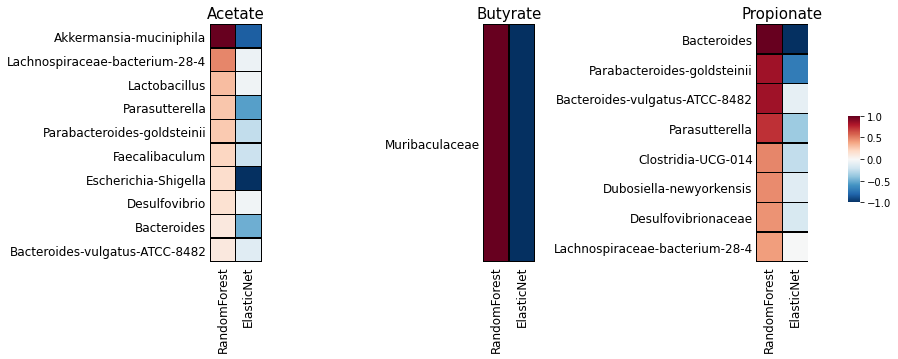

In [9]:
plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=False, figsize=(11,6), save=False)

## w/ time

In [10]:
df_elasnet = pd.read_csv('elasnet_regression_w_time.csv', index_col=0).set_index('SCFA')
df_rf = pd.read_csv('rf_regression_w_time.csv', index_col=0).set_index('SCFA')

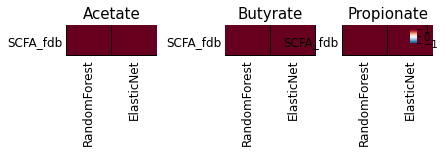

In [11]:
plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=True, figsize=(6,1), save=False)

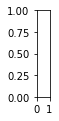

In [12]:
plot_scfa_producer_or_consumer(df_elasnet, df_rf, producer=False, figsize=(12,6), save=False)

# Compare observed and predicted SCFA derivatives 

In [13]:
def predict_scfa_deriv(add_time=False):
    df_pred = None

    # get raw data
    df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
    df_meta = df_meta[df_meta.Diet=='Inulin']
    df_meta = df_meta.drop('Diet', axis=1)
    df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
    df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)

    # get trained model
    target_scfa=['Acetate','Butyrate','Propionate']
    if time:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_w_time.csv', index_col=0)
    else:
        df_opt_paras = pd.read_csv('optimal_rf_parameters_no_time.csv', index_col=0)

    target_scfa_sliced, df_meta_sliced, df_bac_sliced, df_scfa_sliced, df_scfa_deriv = data_processing_scfa(
        df_meta, df_bac, df_scfa, target_scfa, topN=40, normalize_X=True, exclude_group=None, exclude_vendor=None, use_deriv=False)

    _,_,reg = train_scfa_dynamics_model(
        df_meta=df_meta, # meta data
        df_bac=df_bac,  # relative abundace or absolute abundance of gut microbiome
        df_scfa=df_scfa, # SCFA measurement
        target_scfa=target_scfa, # dependent variable(s) in the regression
        topN=40, # keep only the most abundance N taxa in the model
        normalize_X=True, # normalize maximum of bacterial abundance to 1
        exclude_group=None, # group of mice excluded from model training
        exclude_vendor=None, # group of mice excluded from model training
        model='RandomForest',# regression model
        opt_params = df_opt_paras, # optimal model parameters
        addVar=add_time, # if True, add SCFA time, i.e., dSCFA/dt = f(microbiome, SCFA)
        use_deriv=False # use scfa derivative as dependent variables
    )

    # predict SCFA derivative
    for scfa_ in target_scfa:
        df_pred_tmp = deepcopy(df_scfa_deriv)
        df_pred_tmp = df_pred_tmp[[x for x in df_pred_tmp.columns if x not in list(set(target_scfa)-set([scfa_]))]]
        df_pred_tmp = df_pred_tmp.rename({scfa_:'SCFA_deriv_observed'}, axis=1)
        df_pred_tmp['SCFA_mol'] = scfa_
        df_pred_tmp['SCFA_value_observed'] = df_scfa_sliced[scfa_]

        if time:
            X_var = np.concatenate((np.asarray(df_bac_sliced.values), np.asarray(df_scfa_sliced[scfa_]).reshape(-1,1)), 1)
        else:
            X_var = np.asarray(df_bac_sliced.values)
        df_pred_tmp['SCFA_deriv_predicted'] = reg[scfa_].predict(X_var)

        if df_pred is None:
            df_pred = df_pred_tmp
        else:
            df_pred = pd.concat([df_pred, df_pred_tmp], ignore_index=True)

    return df_pred

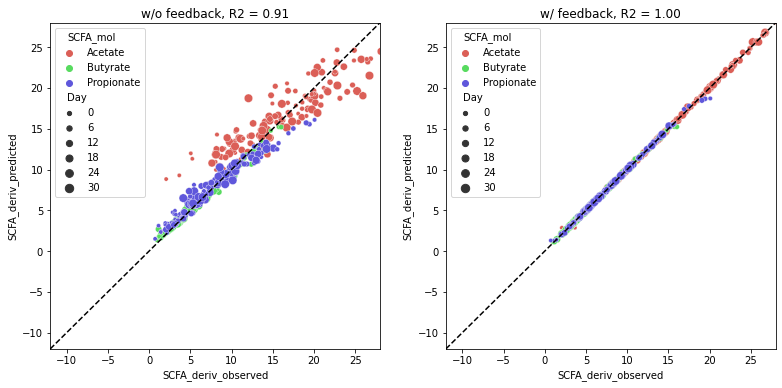

In [14]:
df_pred_no_time = predict_scfa_deriv(time=False)
df_pred_w_time = predict_scfa_deriv(time=True)

fig, ax = plt.subplots(figsize=(13,6), nrows=1, ncols=2)

# no time
_ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred_no_time, ax=ax[0])
_ = ax[0].plot([-12,28],[-12,28],'k--')
_ = ax[0].set_xlim([-12,28])
_ = ax[0].set_ylim([-12,28])
_ = ax[0].set_title('w/o time, R2 = %2.2f'%(r2_score(df_pred_no_time.SCFA_deriv_observed, df_pred_no_time.SCFA_deriv_predicted)))

# w/ time
_ = sns.scatterplot(x='SCFA_deriv_observed',y='SCFA_deriv_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_pred_w_time, ax=ax[1])
_ = ax[1].plot([-12,28],[-12,28],'k--')
_ = ax[1].set_xlim([-12,28])
_ = ax[1].set_ylim([-12,28])
_ = ax[1].set_title('w/ time, R2 = %2.2f'%(r2_score(df_pred_w_time.SCFA_deriv_observed, df_pred_w_time.SCFA_deriv_predicted)))